In [124]:
# https://www.delftstack.com/howto/matplotlib/custom-colormap-using-python-matplotlib/
# https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html   

import matplotlib.pyplot as plt
from matplotlib import cm

# Create dict with key = network #
def print_colors(name,num):
    cm_dict = {}
    cmap = cm.get_cmap(name, num)
    for i in range(cmap.N):
        rgba = cmap(i)
        cm_dict[i]=cm.colors.rgb2hex(rgba)
    print(cm_dict)
    return cm.get_cmap(name,num)


{0: '#440154', 1: '#481668', 2: '#482878', 3: '#443983', 4: '#3e4989', 5: '#375a8c', 6: '#31688e', 7: '#2b758e', 8: '#26828e', 9: '#21918c', 10: '#1f9e89', 11: '#25ab82', 12: '#35b779', 13: '#4ec36b', 14: '#6ece58', 15: '#90d743', 16: '#b5de2b', 17: '#dae319', 18: '#fde725'}


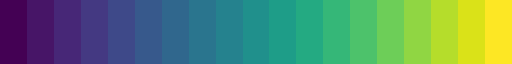

In [125]:
print_colors('viridis', 19)

{0: '#8000ff', 1: '#4757fb', 2: '#0ea4f0', 3: '#2adddd', 4: '#63fbc3', 5: '#9cfba4', 6: '#d4dd80', 7: '#ffa457', 8: '#ff572c', 9: '#ff0000'}


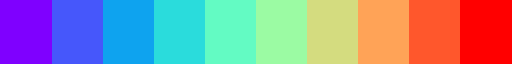

In [126]:
print_colors('rainbow', 10)

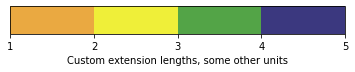

In [127]:
import matplotlib as mpl

colors = ["#eaa941", "#efef39", "#53a447", "#3b387f"] #, "#48a2ba"]
cmap= mpl.colors.ListedColormap(colors)
# cmap = mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])

bounds = [1,2,3,4,5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal',
    label='Custom extension lengths, some other units',
)

plt.show()


TypeError: Colorbar.__init__() got an unexpected keyword argument 'major'

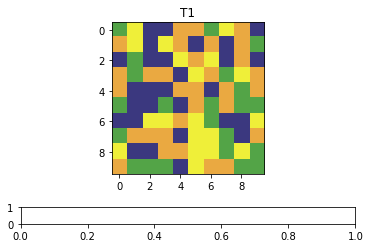

In [162]:
from numpy.random import randn
data = np.clip(randn(250, 250), -1, 1)

def orig():
    fig, ax = plt.subplots()
    ax.set_title('ORIG')
    cax = ax.imshow(data, cmap=cm.afmhot)
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
    cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

def t1():

    colors = ["#eaa941", "#efef39", "#53a447", "#3b387f"]
    cmap= mpl.colors.ListedColormap(colors)

    fig, ax = plt.subplots() #igsize=(10, 1))
    ax.set_title('T1')

    data = np.clip(randn(10, 10), -1, 1)
    cax = ax.imshow(data, cmap=cmap)
  
    '''
        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)
    '''
    cbar = fig.colorbar(cax, ticks=[-2,-1, 0, 1,2], orientation='horizontal')
    # cbar = fig.colorbar(cax, ticks=[1, 2, 3], orientation='horizontal') # only Low on RHS
    cbar.ax.set_xticklabels(['VL','Low1', 'Medium1', 'High1','VH'])  # horizontal colorbar
# orig()
t1()
plt.show()


new ticks [0.5 1.5 2.5 3.5]


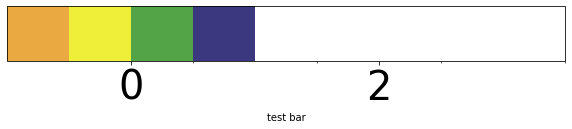

[Text(-2.0, 0, '−2'), Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4')]


In [128]:
import matplotlib as mpl
import numpy as np

def test_color_bar(colors,label,tick_labels):
    cmap= mpl.colors.ListedColormap(colors)
    # cmap = mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])

    # one more and make ''
    bounds = tick_labels#+[5]

    # used to draw ticks
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    norm = mpl.colors.CenteredNorm()

    # defines the width of the entire plot - 10 is wider
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.tick_params(labelsize=40)
    
    # draw ticks in middle of color bars - not working yet
    # https://stackoverflow.com/questions/57337450/matplotlib-center-align-ticks-in-imshow-plot
    # bounds1 = [1.0,2.0,3.0,4.0,5.0] # one more and make ''
    # ax.set_xticklabels(bounds,ha='center', minor=False)

    #  defines the height of the entire plot
    # fig.subplots_adjust(bottom=0.5) # this makes it 1/2 the height
    cb = fig.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap,norm=norm),
        cax=ax,
        # ticks=bounds,
        orientation='horizontal',
        label=label,
    )
    # put the major ticks at the middle of each cell
    num_labels = len(tick_labels)
    new_ticks = np.arange(num_labels) + 0.5
    print("new ticks",new_ticks)
    # ax.set_xticks(new_ticks, minor=False)
    ax.set_xticks(new_ticks, minor=True)
  
    plt.show()
    print( ax.get_xticklabels())
colors = ["#eaa941", "#efef39", "#53a447", "#3b387f"] #, "#48a2ba"]
# names = ['oj','y','g','b']
tick_names = [1,2,3,4]
test_color_bar(colors,'test bar',tick_names)

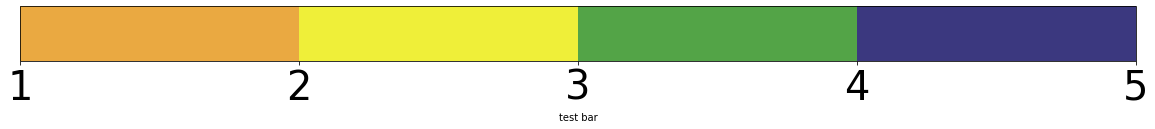

In [166]:
import matplotlib as mpl
import numpy as np

def show_color_bar(colors,label,tick_labels):
    
    cmap= mpl.colors.ListedColormap(colors)
    # cmap = mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])

    # one more and make ''
    bounds = tick_labels+[ tick_labels[-1]+1]

    # used to draw ticks
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # defines the width of the entire plot - 10 is wider
    fig, ax = plt.subplots(figsize=(20, 1))
    ax.tick_params(labelsize=40)
    
    #  defines the height of the entire plot
    # fig.subplots_adjust(bottom=0.5) # this makes it 1/2 the height
    cb = fig.colorbar(
        mpl.cm.ScalarMappable(cmap=cmap,norm=norm),
        cax=ax,
        orientation='horizontal',
        label=label,
    )
  
    plt.show()

colors = ["#eaa941", "#efef39", "#53a447", "#3b387f"] #, "#48a2ba"]
# names = ['oj','y','g','b']
tick_names = [1,2,3,4]
show_color_bar(colors,'test bar',tick_names)

In [183]:
clr_dict = {
#    hex      color_name
1:('#00FFFF','deepskyblue'),
2:('#FF6103','lightsalmon'),
3:('#68228B','purple'),
4:('#FF69B4','hotpink'),
5:('#FF3030','red'),
6:('#808080','gray'),
7:('#1B45F1','blue'),
8:('#FFFF00','yellow'),
9:('#000000','black'),
10:('#8B2323','saddlebrown'),
11:('#006400','darkgreen'),
12:('#00C957','limegreen'),
13:('#87CEFA','lightskyblue'),
14:('#BCA8E2','thistle'),
}

class MyColors:
    def __init__(self,color_dict):
        # color_names = {
        #     num, hex,     anytext-not a real name
        #     1:('#00FFFF','aqua'),
        self.color_dict = color_dict
        d = color_dict
        self.colors_hex = [ d[n][0] for n in d.keys() ]
        self.colors_names = [ d[n][1] for n in d.keys() ]
        self.colors_nums = list(d.keys())
        self.matplot_hex_dict = {}
    
    def get_hex_for_names(self):
        ''' print hex values for names, not the ones in the dict'''
        cmap = mpl.colors.ListedColormap(self.colors_names)
        for i in range(cmap.N):
            rgba = cmap(i)
            self.matplot_hex_dict[i]=cm.colors.rgb2hex(rgba)
        print(self.matplot_hex_dict)

    def create_mp(self):
        import pprint
        d = {}
        for k in self.color_dict.keys():
            d[k]=self.color_dict[k][1]
        pprint.pp(d)



{1: 'deepskyblue',
 2: 'lightsalmon',
 3: 'purple',
 4: 'hotpink',
 5: 'red',
 6: 'gray',
 7: 'blue',
 8: 'yellow',
 9: 'black',
 10: 'saddlebrown',
 11: 'darkgreen',
 12: 'limegreen',
 13: 'lightskyblue',
 14: 'thistle'}


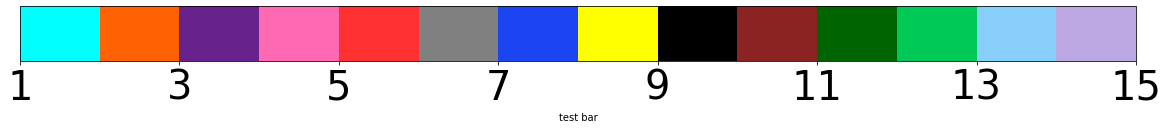

In [184]:
mycb = MyColors(clr_dict)
# mycb.get_hex_for_names()
mycb.create_mp()
show_color_bar(mycb.colors_hex,'test bar',mycb.colors_nums)

In [188]:
# https://matplotlib.org/3.5.0/gallery/color/named_colors.html
unh_colors = {
    1: 'deepskyblue',
    2: 'lightsalmon',
    3: 'purple',
    4: 'hotpink',
    5: 'red',
    6: 'gray',
    7: 'blue',
    8: 'yellow',
    9: 'black',
    10: 'saddlebrown',
    11: 'darkgreen',
    12: 'limegreen',
    13: 'lightskyblue',
    14: 'thistle'
 }
# self.colors_names = [ unh_colors[n][1] for n in d.keys() ]
print( list(unh_colors.values()) )
color_names = list(unh_colors.values())
color_nums = list( unh_colors.keys())
show_color_bar(color_names,'test bar',color_nums)

['deepskyblue', 'lightsalmon', 'purple', 'hotpink', 'red', 'gray', 'blue', 'yellow', 'black', 'saddlebrown', 'darkgreen', 'limegreen', 'lightskyblue', 'thistle']


NameError: name 'colors_nums' is not defined

New ticks [0.5 1.5 2.5 3.5]


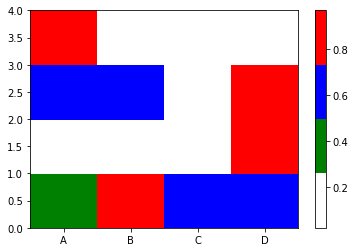

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue','red'])

#data
np.random.seed(42)
data = np.random.rand(4, 4)


fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=cMap)

#legend
cbar = plt.colorbar(heatmap)

# put the major ticks at the middle of each cell
column_labels = list('ABCD')
new_ticks = np.arange( len(column_labels) ) + 0.5
print("New ticks",new_ticks)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

#labels
ax.set_xticklabels(column_labels, minor=False)

plt.show()